LSTM Approach for Stock Market Prediction (Facebook) - Stock Market History

---
Osamah Adam Mohammed


Sep-5-2023


onyx-snow.com

Note: data is available from kaggle

https://www.kaggle.com/datasets/kalilurrahman/facebook-stock-data-live-and-latest

In [ ]:
df4=df5.drop('Dividends',1)
df3=df4.drop('Stock Splits',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
#pick target which is close
data1=df3.reset_index()['Close']

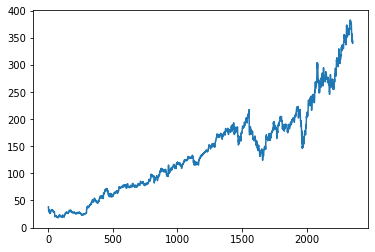

In [ ]:
plt.plot(data1) #showing the plot

In [ ]:
# MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [ ]:
data1

array([[0.05624914],
       [0.04472493],
       [0.03641103],
       ...,
       [0.88319383],
       [0.88259026],
       [0.89252302]])

In [ ]:
training_size=int(len(data1)*0.80)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# split data
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_test.shape), print(ytest.shape)

(371, 100)
(371,)


(None, None)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1786, 100)
(1786,)


(None, None)

In [ ]:
# reshape input to be array

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)

X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
print(X_train)

[[[0.05624914]
  [0.04472493]
  [0.03641103]
  ...
  [0.00872548]
  [0.00732611]
  [0.00685965]]

 [[0.04472493]
  [0.03641103]
  [0.03915489]
  ...
  [0.00732611]
  [0.00685965]
  [0.00524077]]

 [[0.03641103]
  [0.03915489]
  [0.04198107]
  ...
  [0.00685965]
  [0.00524077]
  [0.0055426 ]]

 ...

 [[0.47581288]
  [0.47981893]
  [0.46950199]
  ...
  [0.47383729]
  [0.47498971]
  [0.47161477]]

 [[0.47981893]
  [0.46950199]
  [0.46626425]
  ...
  [0.47498971]
  [0.47161477]
  [0.48494994]]

 [[0.46950199]
  [0.46626425]
  [0.47131295]
  ...
  [0.47161477]
  [0.48494994]
  [0.4814378 ]]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
#build LSTM model

model=Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #LSTM layer

model.add(LSTM(50,return_sequences=True)) #LSTM layer

model.add(LSTM(50))

model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1) #fitting the model

Epoch 1/50
28/28 [==============================] - 15s 288ms/step - loss: 0.0143 - val_loss: 0.0055
Epoch 2/50
28/28 [==============================] - 6s 204ms/step - loss: 5.8412e-04 - val_loss: 0.0015
Epoch 3/50
28/28 [==============================] - 6s 206ms/step - loss: 2.8283e-04 - val_loss: 0.0036
Epoch 4/50
28/28 [==============================] - 6s 210ms/step - loss: 2.6906e-04 - val_loss: 0.0033
Epoch 5/50
28/28 [==============================] - 6s 209ms/step - loss: 2.5515e-04 - val_loss: 0.0032
Epoch 6/50
28/28 [==============================] - 6s 207ms/step - loss: 2.5812e-04 - val_loss: 0.0041
Epoch 7/50
28/28 [==============================] - 6s 205ms/step - loss: 2.5724e-04 - val_loss: 0.0038
Epoch 8/50
28/28 [==============================] - 6s 224ms/step - loss: 2.5658e-04 - val_loss: 0.0045
Epoch 9/50
28/28 [==============================] - 6s 223ms/step - loss: 2.5814e-04 - val_loss: 0.0062
Epoch 10/50
28/28 [==============================] - 6s 201ms/step 

In [ ]:
import tensorflow as tf

In [ ]:
# LSTM prediction
train_predict=model.predict(X_train)
y_predicate=model.predict(X_test)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.013298216441049957

In [ ]:
#error calculation
from sklearn import metrics
print("root mean squared error :",np.sqrt(metrics.mean_squared_error(ytest,test_predict)))
print("mean squared error :", metrics.mean_squared_error(ytest,y_predicate))
print("mean absolute :", metrics.mean_absolute_error(ytest,y_predicate))

root mean squared error : 0.03986267107416222
mean squared error : 0.0015890325451668496
mean absolute : 0.03129816885610347


In [ ]:
#differences
dataFrame= pd.DataFrame({'actual':ytest.flatten(), 'predicted':y_predicate.flatten(), 'Differences':ytest.flatten()-y_predicate.flatten()})
print(dataFrame)

       actual  predicted  Differences
0    0.440225   0.416027     0.024198
1    0.436932   0.421868     0.015065
2    0.434957   0.427700     0.007257
3    0.443161   0.433071     0.010090
4    0.440417   0.438015     0.002402
..        ...        ...          ...
366  0.919824   0.883567     0.036257
367  0.921526   0.873168     0.048357
368  0.886047   0.864817     0.021231
369  0.883194   0.856906     0.026288
370  0.882590   0.849517     0.033073

[371 rows x 3 columns]


In [ ]:
#model evaluation accuracy
from sklearn.metrics import r2_score
r2_score(ytest,y_predicate)

0.9090719902218446

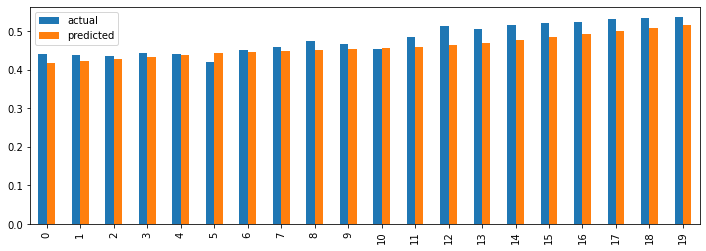

In [ ]:
#visualization for evaluation
dataFram2= pd.DataFrame({'actual':ytest.flatten(), 'predicted':y_predicate.flatten()})

visual= dataFram2.head(20)
visual.plot(kind='bar',figsize=(12, 4))